In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.table import Table
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
#You'll need to pip install helpers; the repo is here: https://bitbucket.org/yymao/helpers
from helpers.SimulationAnalysis import SimulationAnalysis, iterTrees
from helpers.SimulationAnalysis import readHlist

In [3]:
#Path to simulation data
path_to_data = ''

#Halo properties to load; see Section 2.4 of https://arxiv.org/abs/2008.08591 for info on Rockstar fields 
fields = ['scale','id', 'upid', 'pid', 'mvir', 'mpeak', 'rvir', 'vmax', 'vpeak', 'x', 'y', 'z', 'vx', 'vy', 'vz',
          'M200c', 'depth_first_id','scale_of_last_MM']

#Load z = 0 halo list for Halo416_16K
halos_z0 = readHlist(path_to_data+'hlist_1.00000.list',fields=fields)
MW_analog = halos_z0[np.argmax(halos_z0['mvir'])] #argmax provides index of max 

subhalos_z0 = halos_z0[halos_z0['upid']==MW_analog['id']] #upid is the parent id of the halo and we asked it to be the MW one 
LMC_analog = subhalos_z0[np.argmax(subhalos_z0['mvir'])] #LMC is the most massive one Large Magellanic Cloud 

ind_lmc = subhalos_z0['pid']==LMC_analog['id']


In [4]:
LMC_analog['x'], MW_analog['x'], (LMC_analog['x']- MW_analog['x'])*1000*h

NameError: name 'h' is not defined

In [6]:
t = Table.read('snapshot_now.fits')

In [7]:
h=0.7
subhalos_z0['x'] = (subhalos_z0['x'] - MW_analog['x'])*1000/h
subhalos_z0['y'] = (subhalos_z0['y'] - MW_analog['y'])*1000/h
subhalos_z0['z'] = (subhalos_z0['z'] - MW_analog['z'])*1000/h

In [8]:
LMC_analog['x'], MW_analog['x'], (LMC_analog['x']- MW_analog['x'])*1000*h

(-90.98598, 63.67773, -108264.5980834961)

In [9]:
LMC_analog_x, (LMC_analog['x']- MW_analog['x'])*1000*h

NameError: name 'LMC_analog_x' is not defined

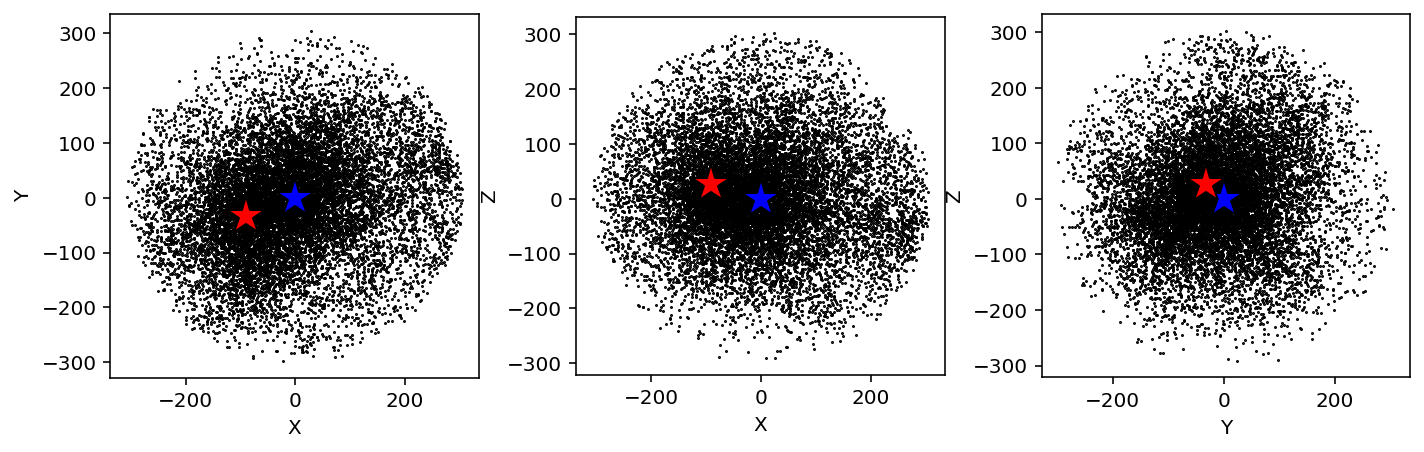

In [10]:
fig, ax = plt.subplots(1,3,figsize=(10,16))

plt.sca(ax[0])
plt.plot(subhalos_z0['x'], subhalos_z0['y'], 'k.', ms=1)
plt.plot(0, 0, 'b*', mec='k', ms=20)
plt.plot(LMC_analog['x'], LMC_analog['y'], 'r*', mec='k', ms=20)

plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal')

plt.sca(ax[1])
plt.plot(subhalos_z0['x'], subhalos_z0['z'], 'k.', ms=1)
plt.plot(0, 0, 'b*', mec='k', ms=20)
plt.plot(LMC_analog['x'], LMC_analog['z'], 'r*', mec='k', ms=20)

plt.xlabel('X')
plt.ylabel('Z')
plt.gca().set_aspect('equal')

plt.sca(ax[2])
plt.plot(subhalos_z0['y'], subhalos_z0['z'], 'k.', ms=1)
plt.plot(0, 0, 'b*', mec='k', ms=20)
plt.plot(LMC_analog['y'], LMC_analog['z'], 'r*', mec='k', ms=20)

plt.xlabel('Y')
plt.ylabel('Z')
plt.gca().set_aspect('equal')

plt.tight_layout(h_pad=0, w_pad=0)

(-300.0, 300.0)

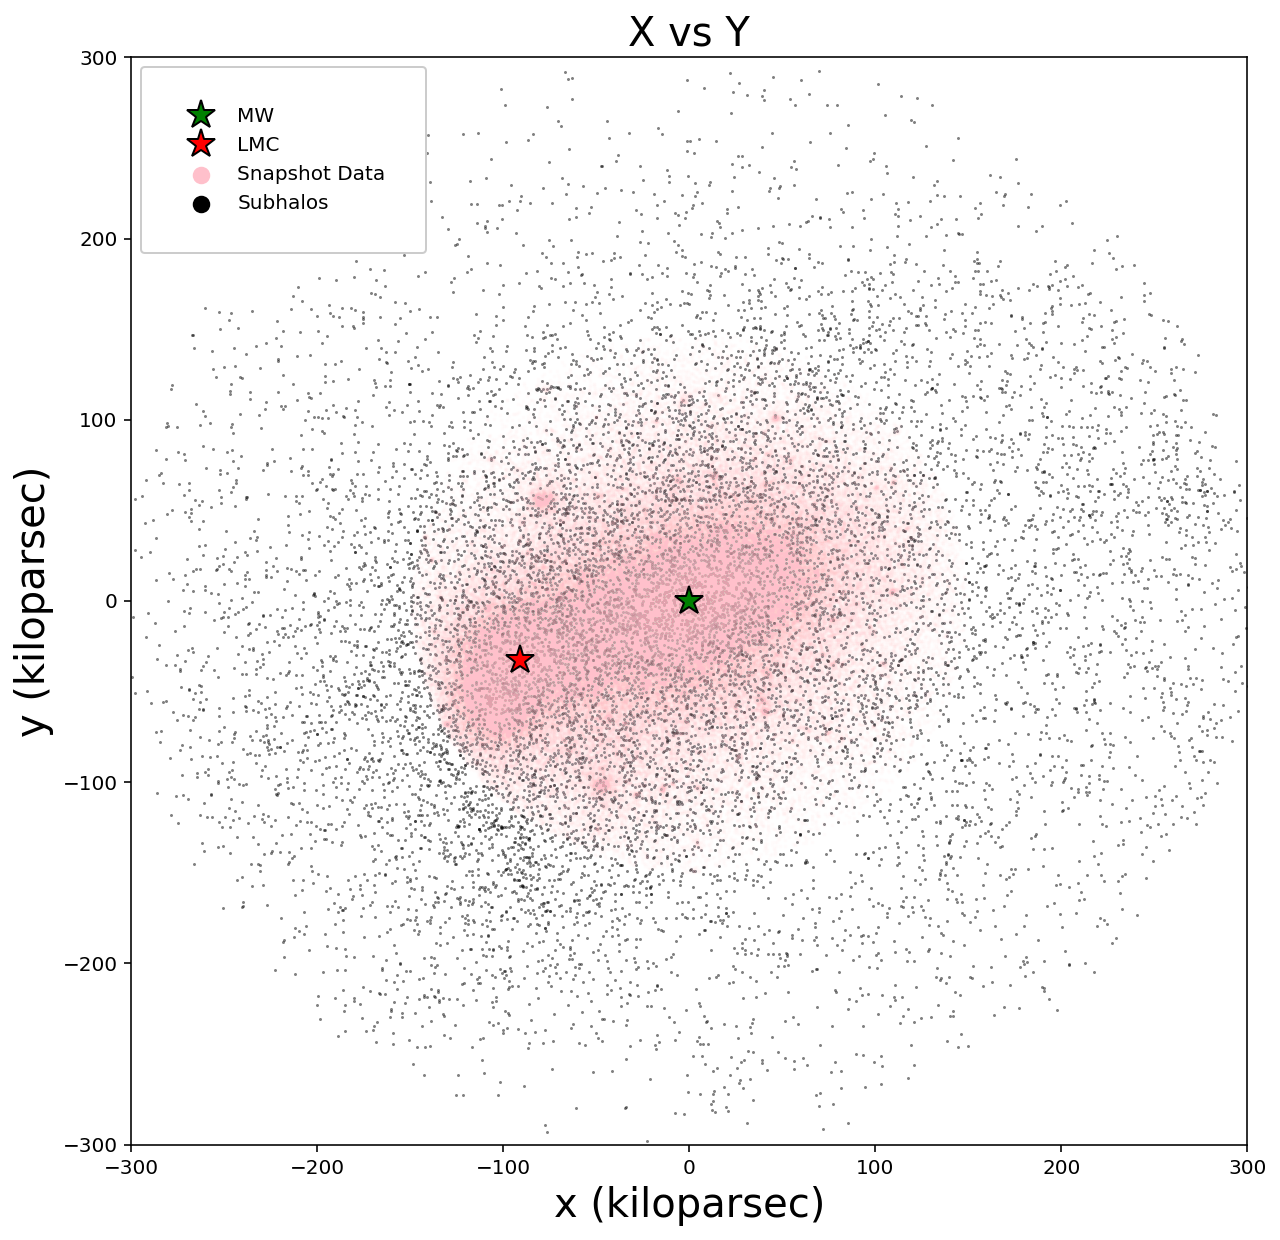

In [12]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.plot(subhalos_z0['x'], subhalos_z0['y'], 'k.', ms=1, alpha=0.5) #1 Mega Parsec = 1000 Kilo Parsec 

plt.plot(t['x'],t['y'],color='pink',marker='o',ms=1,ls='None', alpha = 0.03)

plt.plot(0, 0, 'g*', mec='k', ms=15, label='MW')
plt.plot(LMC_analog['x'], LMC_analog['y'], 'r*', mec='k', ms=15, alpha=1, label='LMC')

plt.scatter(1000,10000, marker='o', color='pink', s=60, label='Snapshot Data')
plt.scatter(1000,10000, marker='o', color='black', s=60, label='Subhalos')

plt.xlabel('x (kiloparsec)', fontsize=20)
plt.ylabel('y (kiloparsec)', fontsize=20)
plt.title('X vs Y', fontsize=20)
plt.legend(loc='best')

plt.legend(facecolor='white', framealpha=1, borderpad=2, loc='best')
plt.xlim(-300,300)
plt.ylim(-300,300)


(-300.0, 300.0)

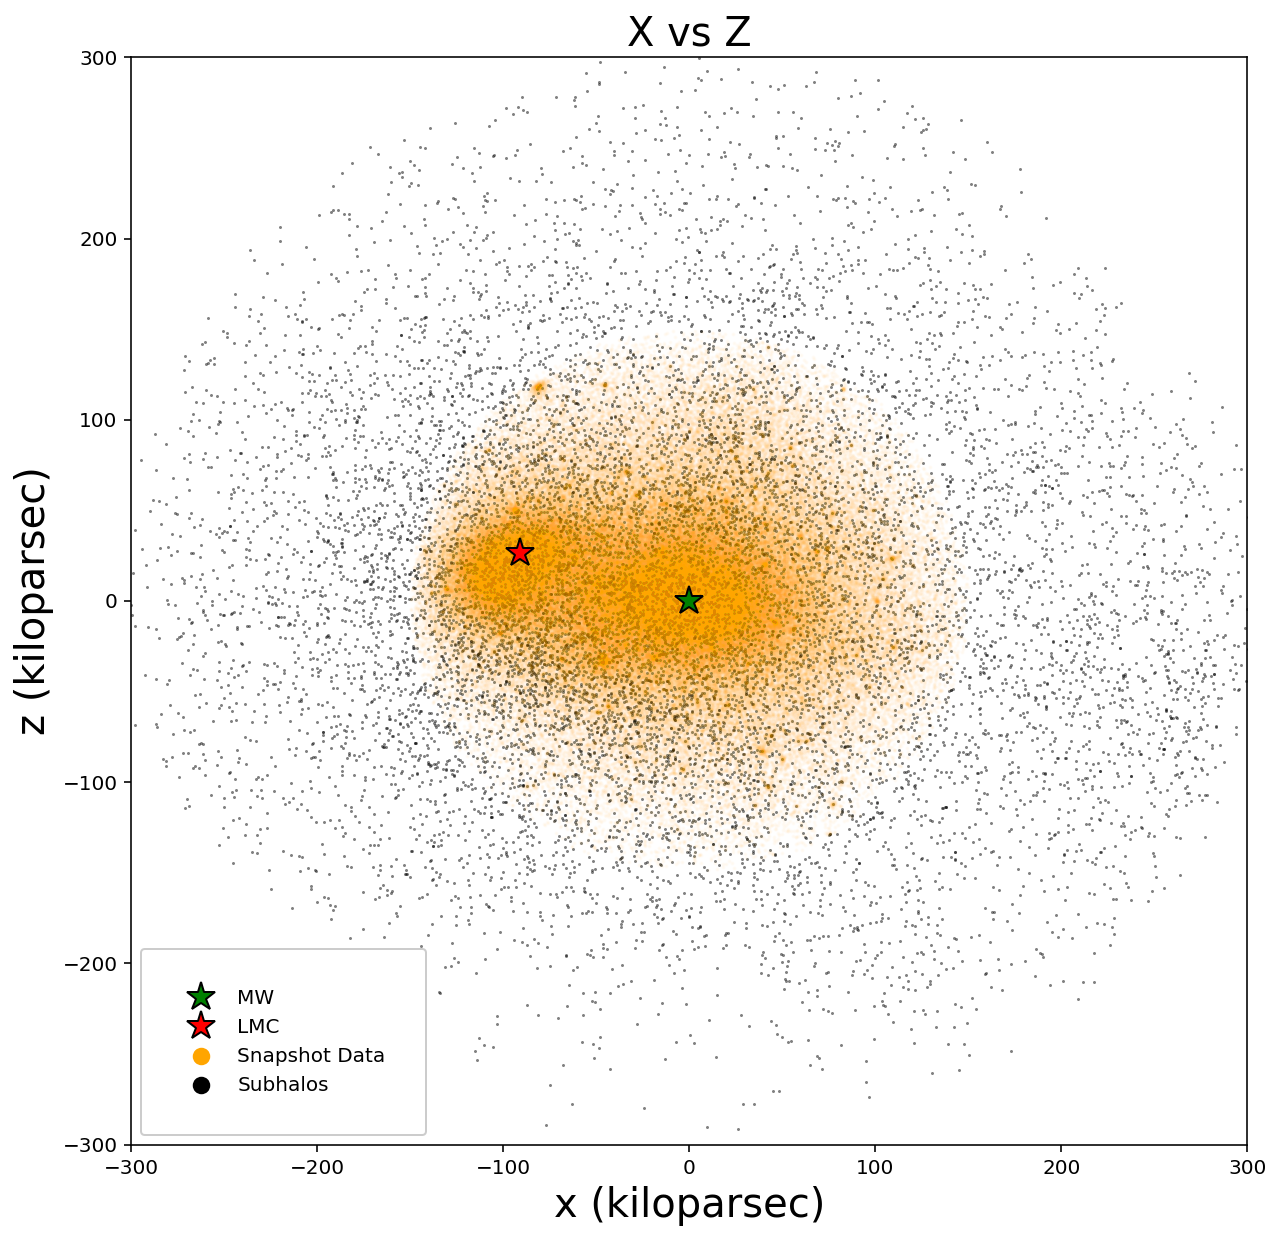

In [11]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.plot(subhalos_z0['x'], subhalos_z0['z'], 'k.', ms=1, alpha=0.5) #1 Mega Parsec = 1000 Kilo Parsec 

plt.plot(t['x'],t['z'],color='orange',marker='o',ms=1,ls='None', alpha = 0.03)

plt.plot(0, 0, 'g*', mec='k', ms=15, label='MW')
plt.plot(LMC_analog['x'], LMC_analog['z'], 'r*', mec='k', ms=15, alpha=1, label='LMC')

plt.scatter(1000,10000, marker='o', color='orange', s=60, label='Snapshot Data')
plt.scatter(1000,10000, marker='o', color='black', s=60, label='Subhalos')

plt.xlabel('x (kiloparsec)', fontsize=20)
plt.ylabel('z (kiloparsec)', fontsize=20)
plt.title('X vs Z', fontsize=20)
plt.legend(facecolor='white', framealpha=1, borderpad=2, loc='best')
plt.xlim(-300,300)
plt.ylim(-300,300)


(-300.0, 300.0)

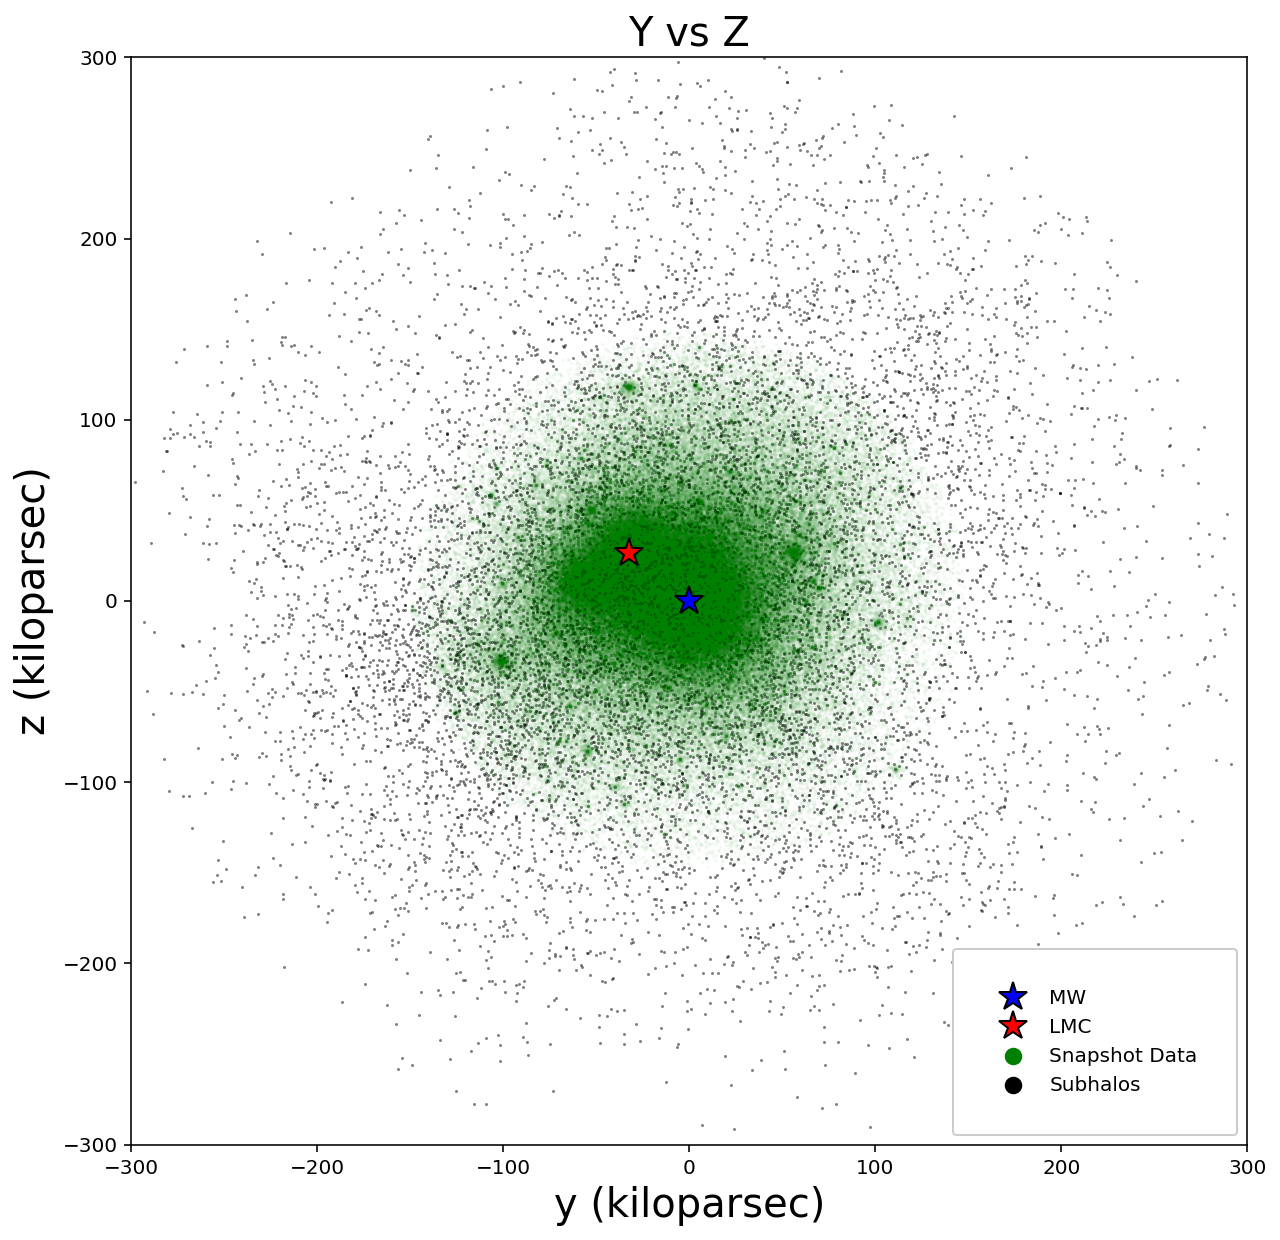

In [12]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.plot(subhalos_z0['y'], subhalos_z0['z'], 'k.', ms=1, alpha=0.5) #1 Mega Parsec = 1000 Kilo Parsec 

plt.plot(t['y'],t['z'],color='green',marker='o',ms=1,ls='None', alpha = 0.03)

plt.plot(0, 0, 'b*', mec='k', ms=15, label='MW')
plt.plot(LMC_analog['y'], LMC_analog['z'], 'r*', mec='k', ms=15, alpha=1, label='LMC')

plt.scatter(1000,10000, marker='o', color='green', s=60, label='Snapshot Data')
plt.scatter(1000,10000, marker='o', color='black', s=60, label='Subhalos')

plt.xlabel('y (kiloparsec)', fontsize=20)
plt.ylabel('z (kiloparsec)', fontsize=20)
plt.title('Y vs Z', fontsize=20)
plt.legend(facecolor='white', framealpha=1, borderpad=2, loc='best')
plt.xlim(-300,300)
plt.ylim(-300,300)

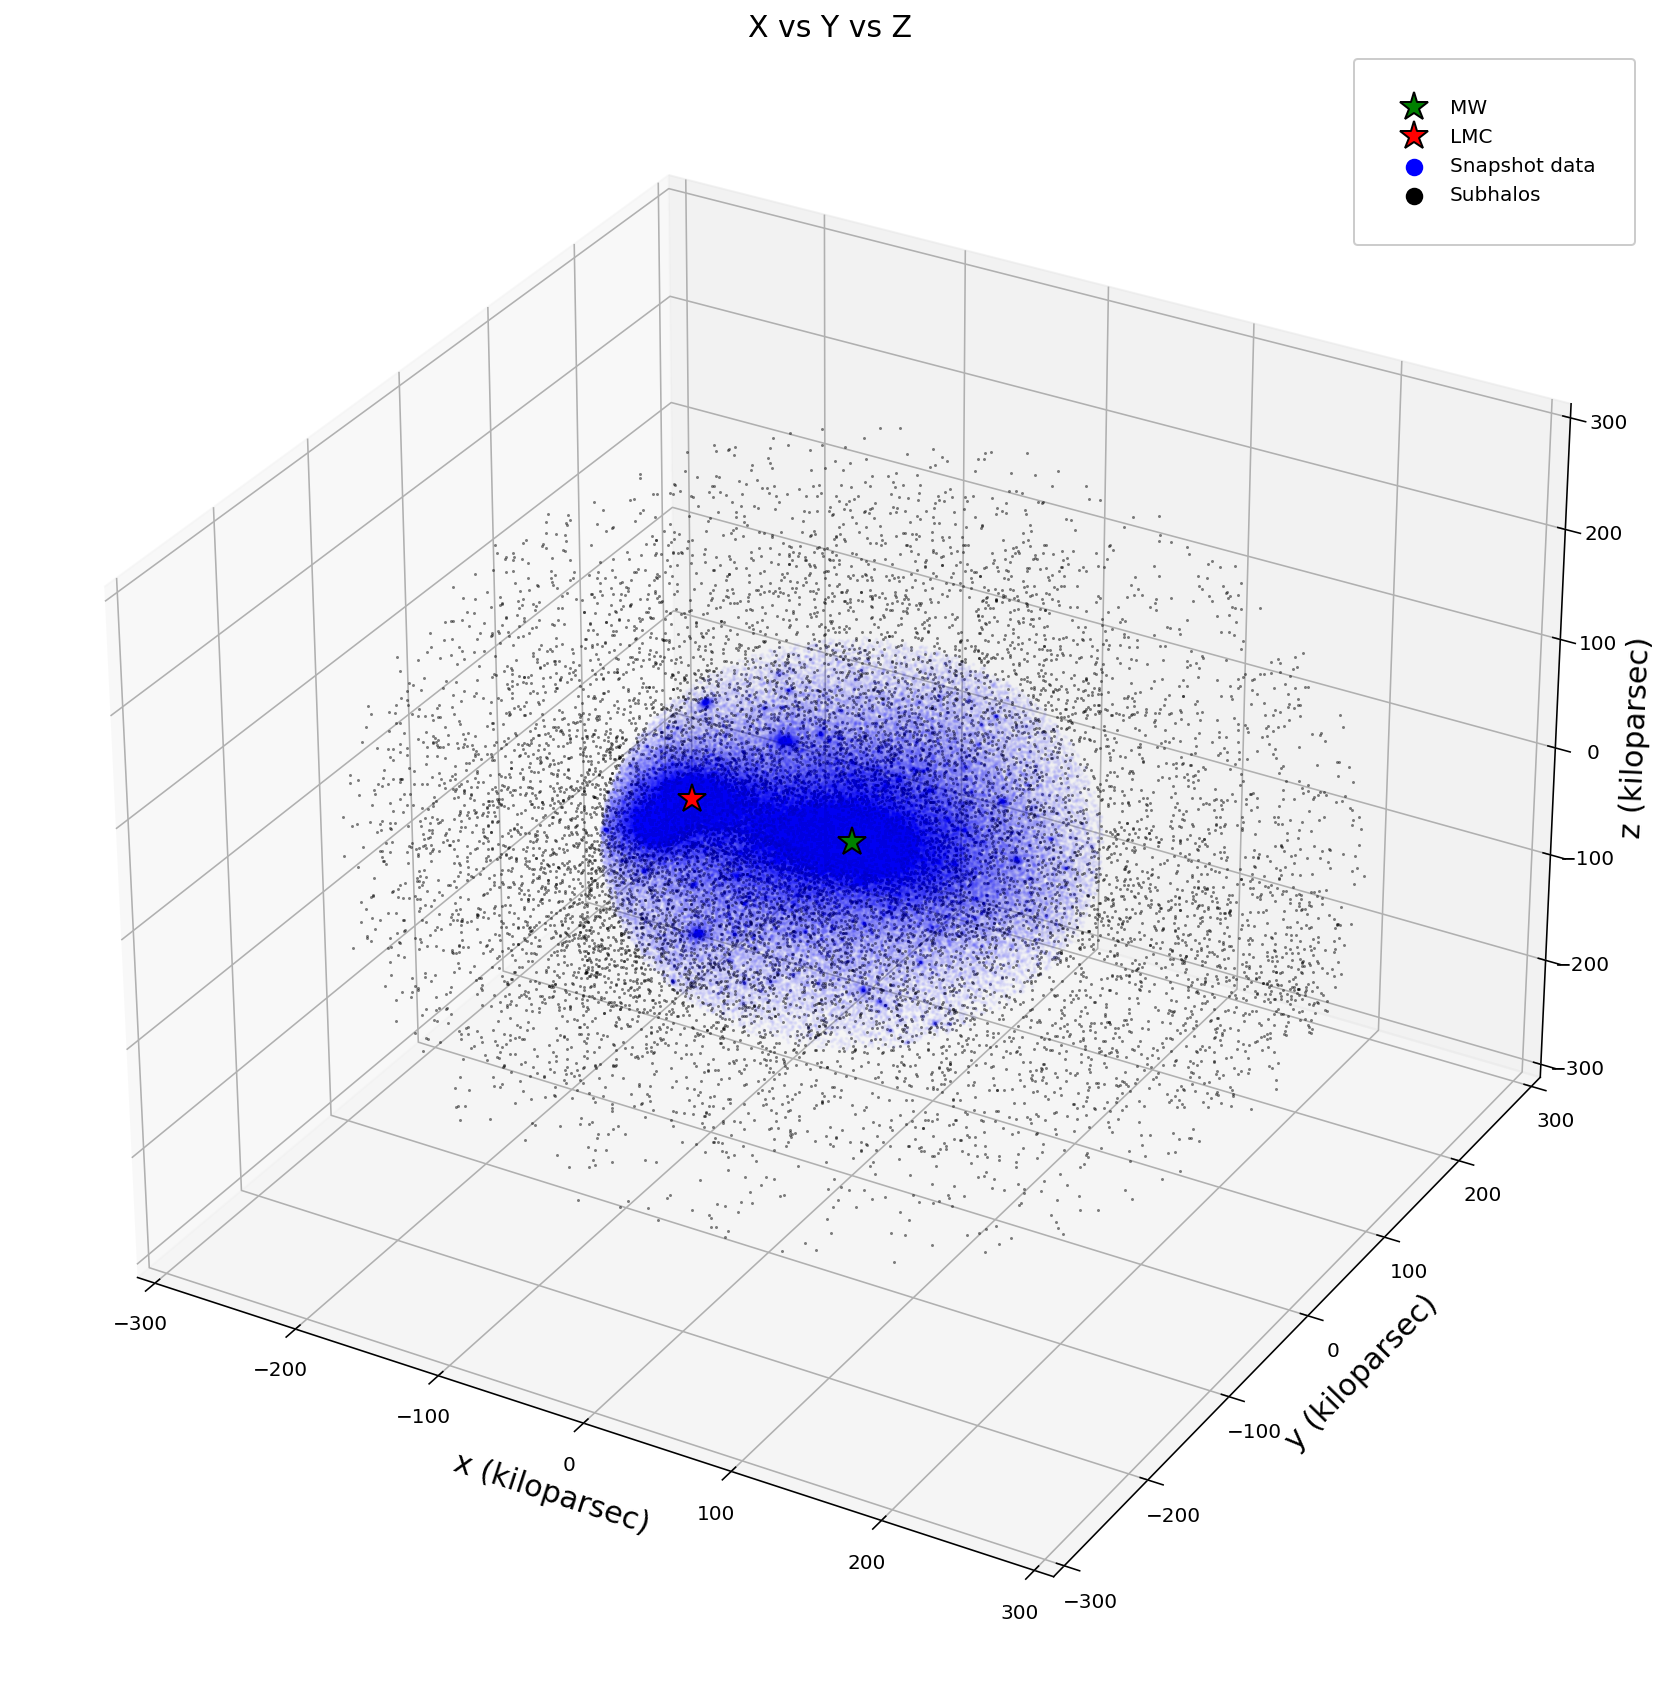

In [13]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)

ax = plt.axes(projection='3d')

ax.plot(subhalos_z0['x'], subhalos_z0['y'], subhalos_z0['z'], 'k.', ms=1, alpha=0.5) #1 Mega Parsec = 1000 Kilo Parsec 

ax.plot(t['x'], t['y'],t['z'],color='blue',marker='o', ms=1,ls='None', alpha = 0.03)

ax.plot(0, 0, 0, 'g*', mec='k', ms=15, label='MW')
ax.plot(LMC_analog['x'], LMC_analog['y'], LMC_analog['z'], 'r*', mec='k', ms=15, alpha=1, label='LMC')

ax.scatter(1000,10000, marker='o', color='blue', s=60, label='Snapshot data')
ax.scatter(1000,10000, marker='o', color='black', s=60, label='Subhalos')

ax.set_xlabel('x (kiloparsec)', fontsize=15)
ax.set_ylabel('y (kiloparsec)', fontsize=15)
ax.set_zlabel('z (kiloparsec)', fontsize=15)
plt.title('X vs Y vs Z', fontsize=15)
plt.legend(facecolor='white', framealpha=1, borderpad=2, loc='best')
ax.set_xlim(-300,300)
ax.set_ylim(-300,300)
ax.set_zlim(-300,300)

plt.savefig('Week2 Figures')

In [14]:
%matplotlib notebook

<IPython.core.display.Javascript object>


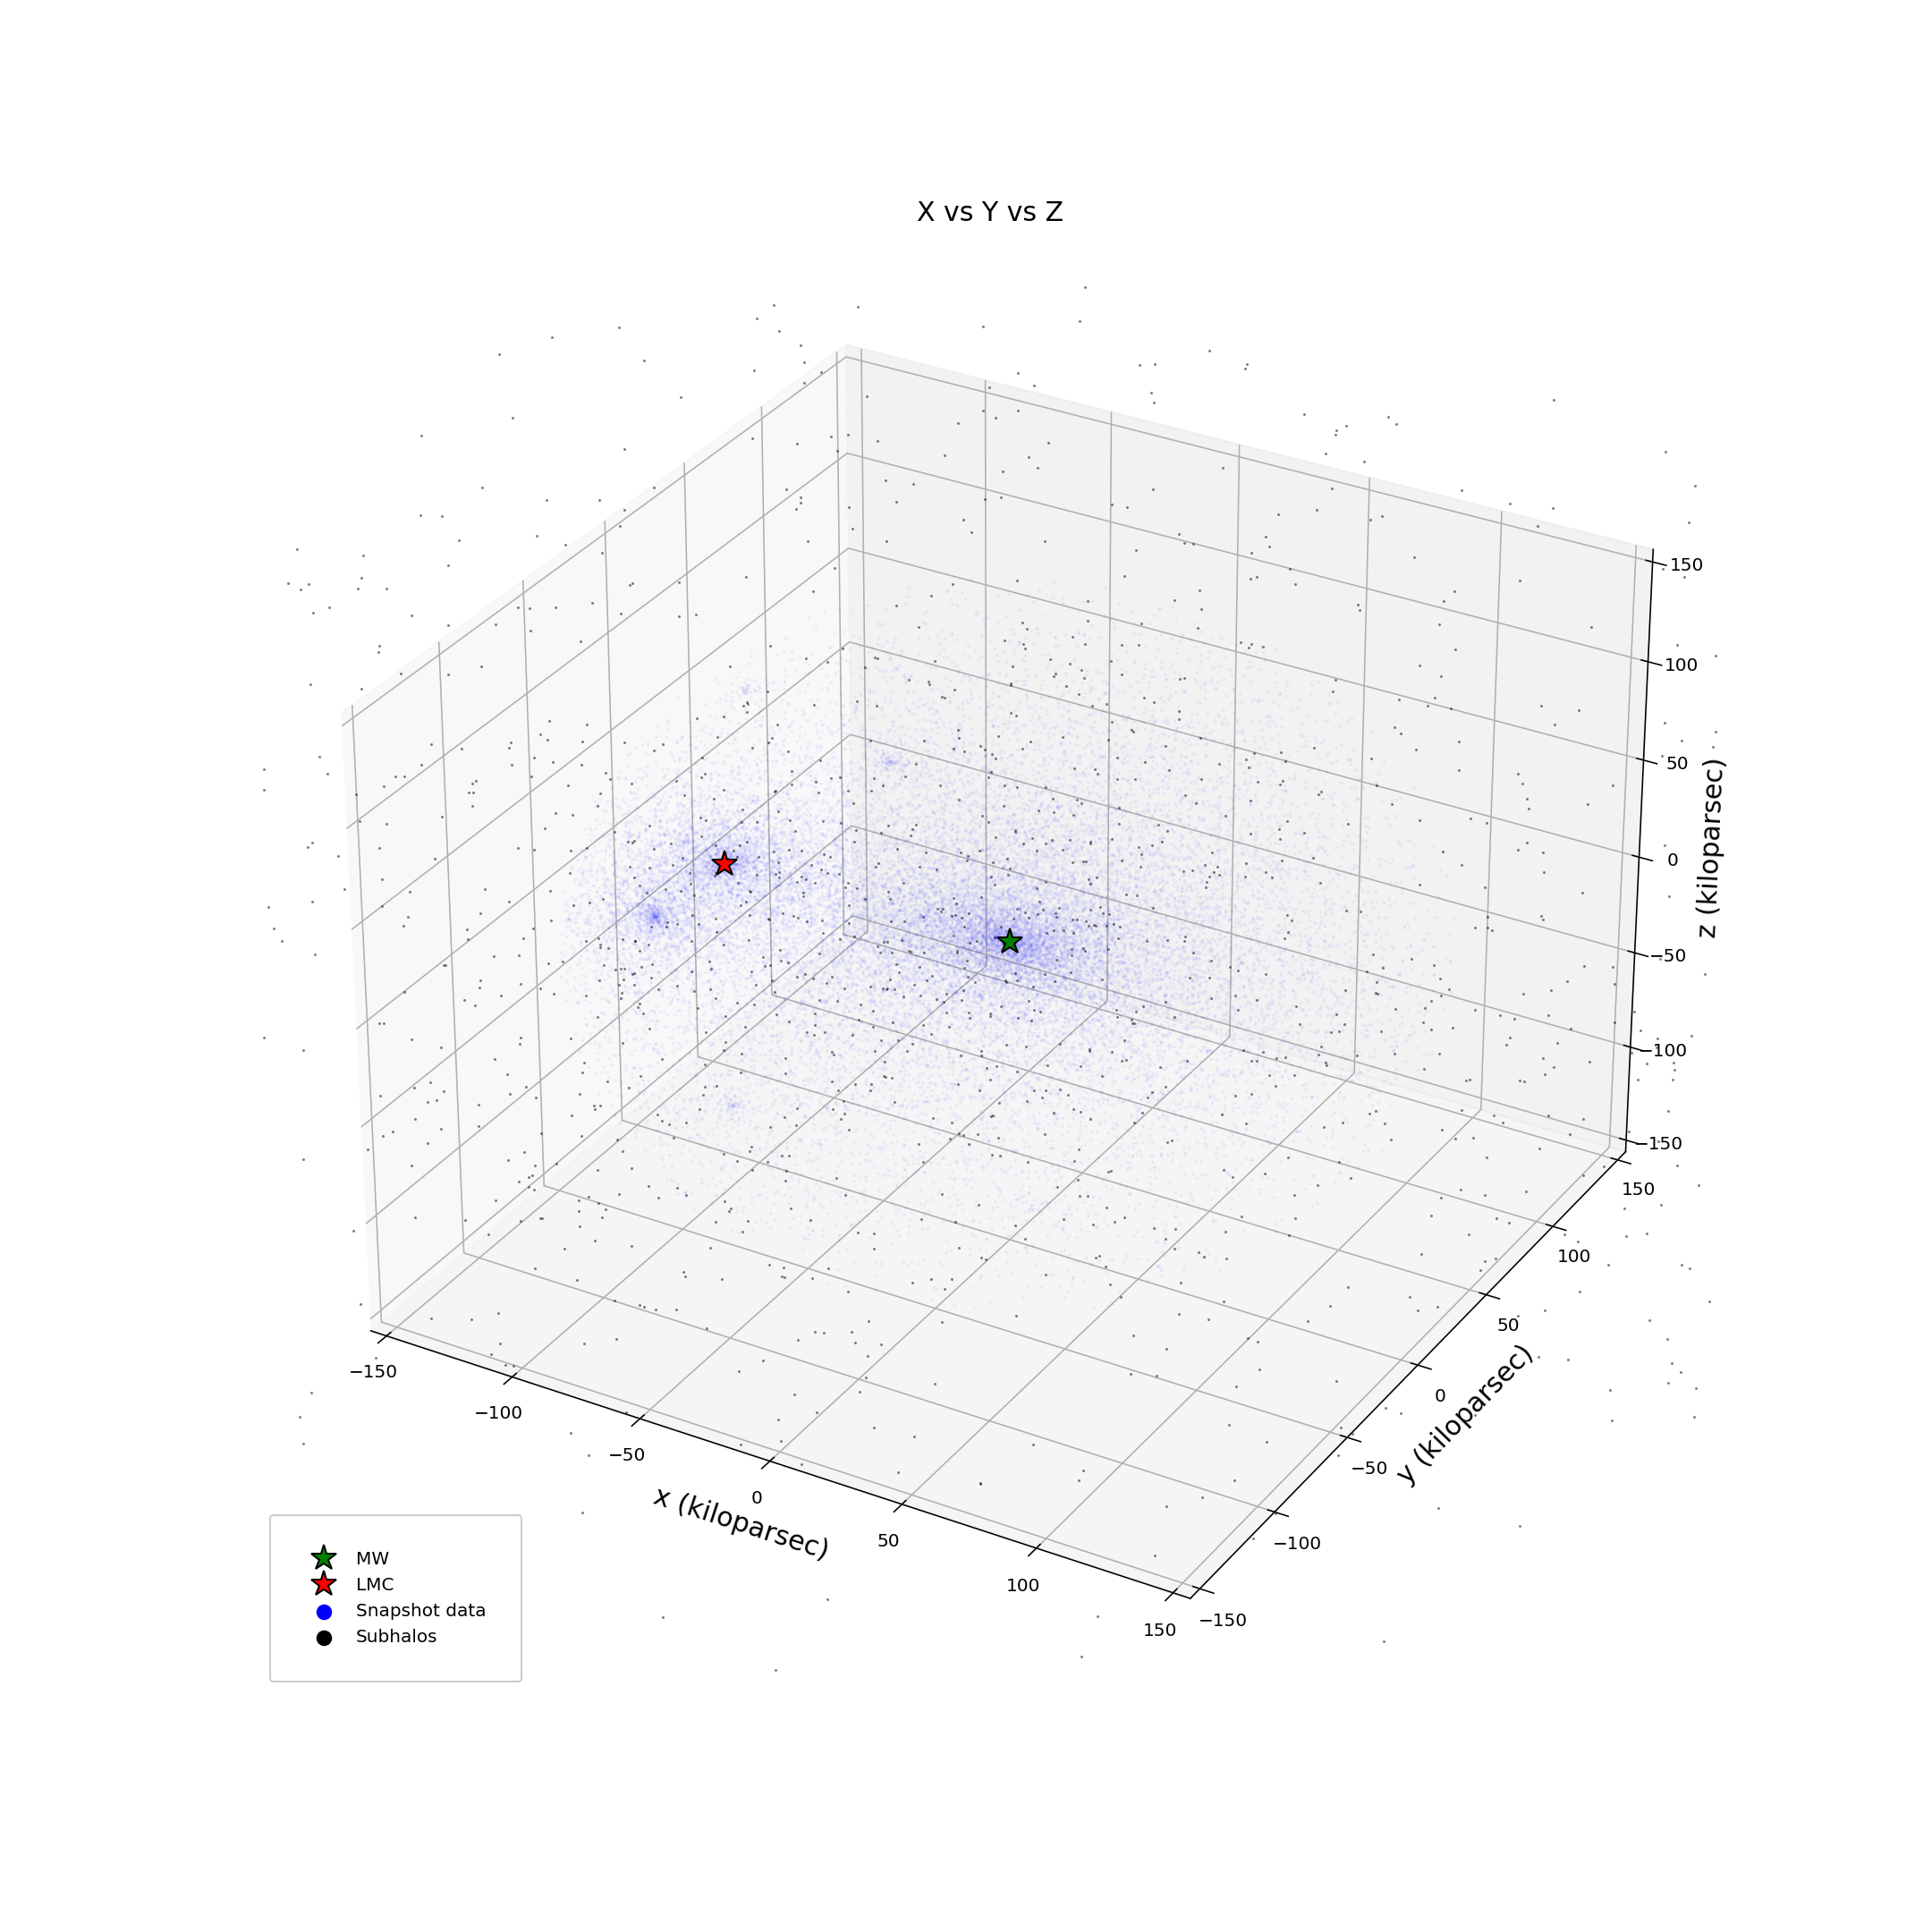

(-150.0, 150.0)

In [15]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)

ax = plt.axes(projection='3d')

ax.plot(subhalos_z0['x'][::10], subhalos_z0['y'][::10], subhalos_z0['z'][::10], 'k.', ms=1, alpha=0.5) #1 Mega Parsec = 1000 Kilo Parsec 

ax.plot(t['x'][::10], t['y'][::10],t['z'][::10],color='blue',marker='o', ms=1,ls='None', alpha = 0.03)

ax.plot(0, 0, 0, 'g*', mec='k', ms=15, label='MW')
ax.plot(LMC_analog['x'], LMC_analog['y'], LMC_analog['z'], 'r*', mec='k', ms=15, alpha=1, label='LMC')

ax.scatter(1000,10000, marker='o', color='blue', s=60, label='Snapshot data')
ax.scatter(1000,10000, marker='o', color='black', s=60, label='Subhalos')

plt.xlabel('x (kiloparsec)', fontsize=15)
plt.ylabel('y (kiloparsec)', fontsize=15)
ax.set_zlabel('z (kiloparsec)', fontsize=15)
plt.title('X vs Y vs Z', fontsize=15)
plt.legend(facecolor='white', framealpha=1, borderpad=2, loc='best')
ax.set_xlim(-150,150)
ax.set_ylim(-150,150)
ax.set_zlim(-150,150)
